In [16]:
%load_ext autoreload
%autoreload 2
from data import *
from train import *
from models import *
device = "cuda"
from torchvision.models import resnet18

ab_path = "ab/ab/ab2.npy"
l_path = "l/gray_scale.npy"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
trainLoader = load_npy_data(ab_path, l_path, size=256, n=50, batch_size=32, test=False, num_workers=4, pin_memory=True)

In [19]:
generator = UNet(1,2).to(device)
discriminator = Discriminator(3, patch=False).to(device)
optimizer_gen = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_disc = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

In [20]:
generator.load_state_dict(torch.load("Models/GAN_100_10.0_0.0002_0.001_1000/generator.pth"))

<All keys matched successfully>

/lustre/home/lmucko/colorization/data.py:17: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 313 negative Z values that have been clipped to zero
  rgb = color.lab2rgb(lab)
/lustre/home/lmucko/colorization/data.py:17: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 121 negative Z values that have been clipped to zero
  rgb = color.lab2rgb(lab)
/lustre/home/lmucko/colorization/data.py:17: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 88 negative Z values that have been clipped to zero
  rgb = color.lab2rgb(lab)
/lustre/home/lmucko/colorization/data.py:17: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 57 negative Z values that have been clipped to zero
  rgb = color.lab2rgb(lab)
/lustre/home/lmucko/colorization/data.py:17: UserWarning: Conversion from CIE-LAB, via XYZ to sRGB color space resulted in 837 negative Z values that have been clipped to zero
  rgb = color.

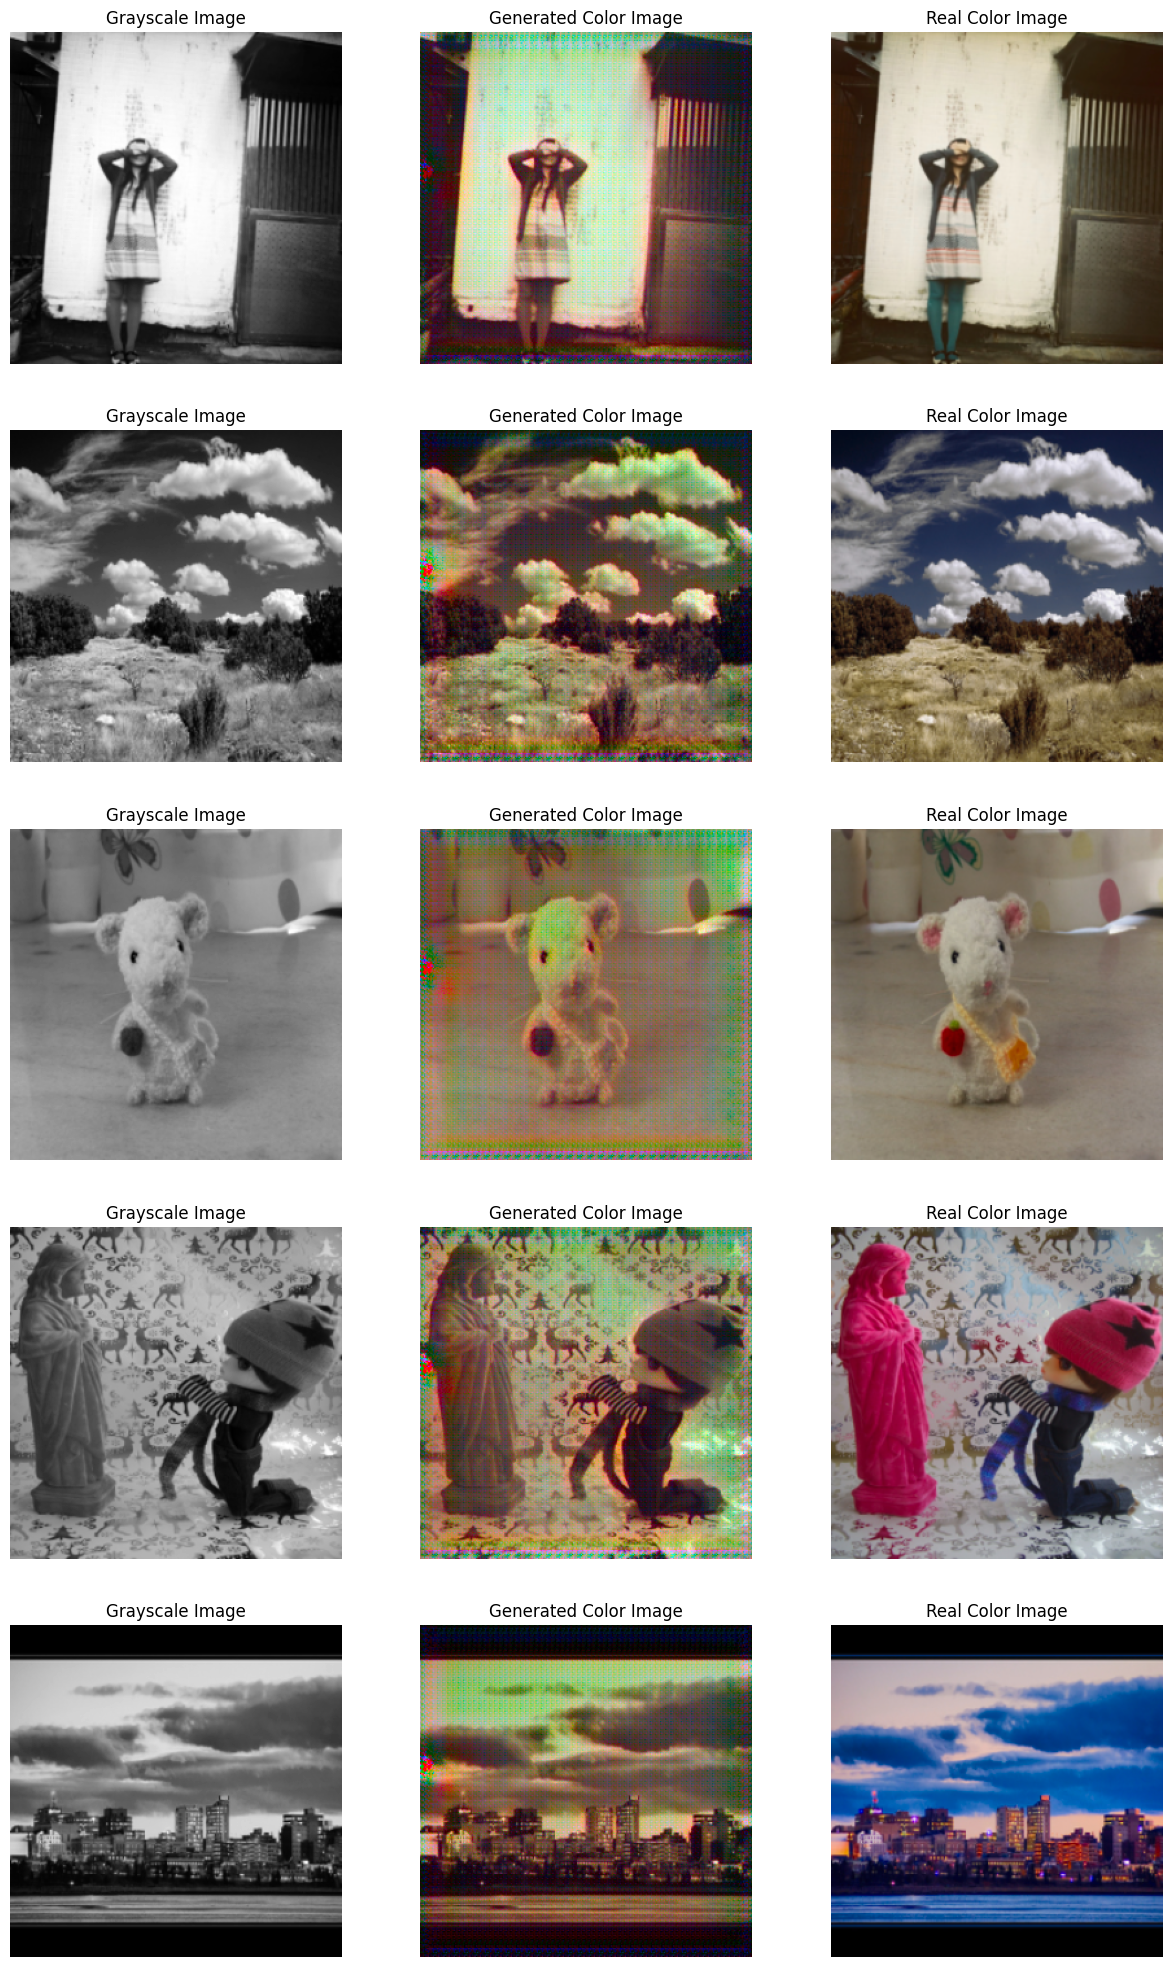

In [21]:
visualize(generator, trainLoader, n=5)